In [0]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
# Define the stock to download
tickers =[
          'IBM'
]

In [0]:
# We would like all available data from 01/01/2014 until 1/29/2017.
start_date = '2014-01-01'
end_date = '2017-12-29'

# User pandas_reader.data.DataReader to load the desired data.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [0]:
# Look for null values #
df = panel_data['Close']
print(df.isnull().sum())

print(df.shape)
print(df.describe())

Symbols
IBM    0
dtype: int64
(1007, 1)
Symbols          IBM
count    1007.000000
mean      161.461023
std        17.005505
min       117.849998
25%       150.055000
50%       159.529999
75%       173.800003
max       197.770004


### Compute Moving Averages ###

In [0]:
#Compute Moving Averages
MA5 = df.iloc[:,0].rolling(window=5).mean()
MA10 = df.iloc[:,0].rolling(window=10).mean()
MA20 = df.iloc[:,0].rolling(window=20).mean()


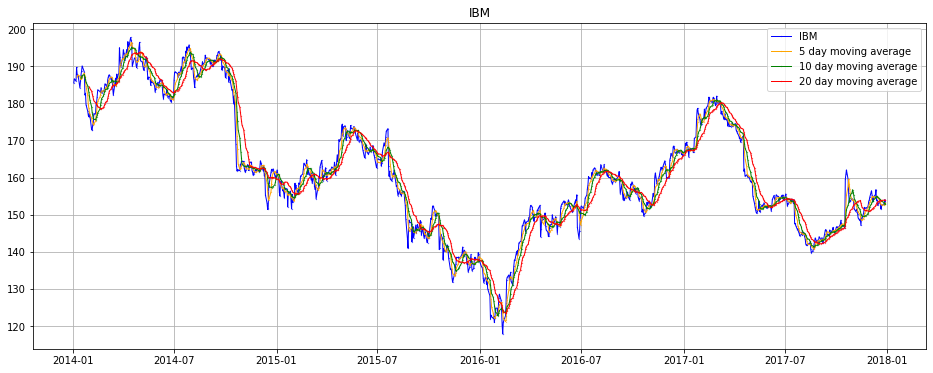

In [0]:
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(df, marker='o', markerfacecolor='blue', markersize=.25, color='blue', linewidth=1, label = "IBM")
ax.plot(MA5, marker='o', markerfacecolor='blue', markersize=.25, color='orange', linewidth=1, label = "5 day moving average")
ax.plot(MA10, marker='o', markerfacecolor='blue', markersize=.25, color='green', linewidth=1, label = "10 day moving average")
ax.plot(MA20, marker='o', markerfacecolor='blue', markersize=.25, color='red', linewidth=1, label = "20 day moving average")
ax.set_xlabel = "Date"
ax.set_ylabel = "Stock Price"
plt.title('IBM')
plt.legend()
plt.grid()

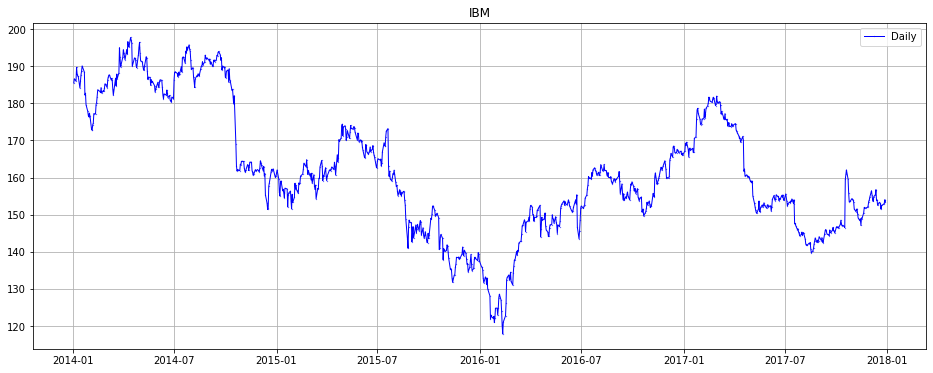

In [0]:
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(df, marker='o', markerfacecolor='blue', markersize=.25, color='blue', linewidth=1, label = "Daily")
#ax.plot(MA5, marker='o', markerfacecolor='blue', markersize=.25, color='orange', linewidth=1, label = "5 day moving average")
#ax.plot(MA10, marker='o', markerfacecolor='blue', markersize=.25, color='green', linewidth=1, label = "10 day moving average")
#ax.plot(MA20, marker='o', markerfacecolor='blue', markersize=.25, color='red', linewidth=1, label = "20 day moving average")
ax.set_xlabel = "Date"
ax.set_ylabel = "Stock Price"
plt.title('IBM')
plt.legend()
plt.grid()

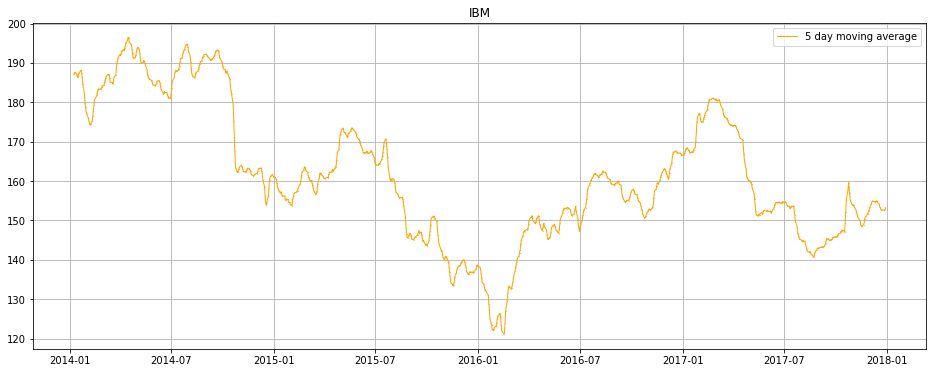

In [0]:
fig, ax = plt.subplots(figsize = (16,6))
#ax.plot(df, marker='o', markerfacecolor='blue', markersize=.25, color='blue', linewidth=1, label = "IBM")
ax.plot(MA5, marker='o', markerfacecolor='blue', markersize=.25, color='orange', linewidth=1, label = "5 day moving average")
#ax.plot(MA10, marker='o', markerfacecolor='blue', markersize=.25, color='green', linewidth=1, label = "10 day moving average")
#ax.plot(MA20, marker='o', markerfacecolor='blue', markersize=.25, color='red', linewidth=1, label = "20 day moving average")
ax.set_xlabel = "Date"
ax.set_ylabel = "Stock Price"
plt.title('IBM')
plt.legend()
plt.grid()

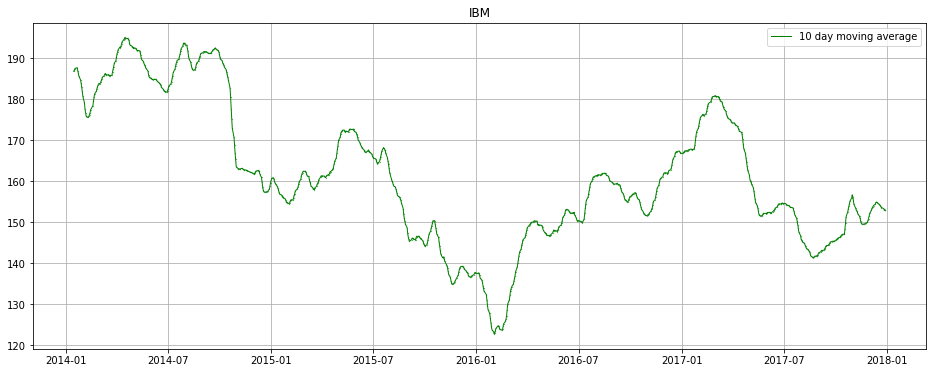

In [0]:
fig, ax = plt.subplots(figsize = (16,6))
#ax.plot(df, marker='o', markerfacecolor='blue', markersize=.25, color='blue', linewidth=1, label = "IBM")
#ax.plot(MA5, marker='o', markerfacecolor='blue', markersize=.25, color='orange', linewidth=1, label = "5 day moving average")
ax.plot(MA10, marker='o', markerfacecolor='blue', markersize=.25, color='green', linewidth=1, label = "10 day moving average")
#ax.plot(MA20, marker='o', markerfacecolor='blue', markersize=.25, color='red', linewidth=1, label = "20 day moving average")
ax.set_xlabel = "Date"
ax.set_ylabel = "Stock Price"
plt.title('IBM')
plt.legend()
plt.grid()

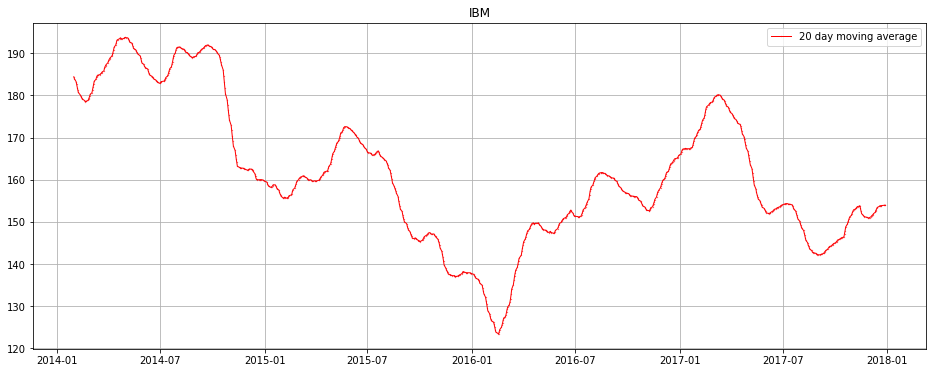

In [0]:
fig, ax = plt.subplots(figsize = (16,6))
#ax.plot(df, marker='o', markerfacecolor='blue', markersize=.25, color='blue', linewidth=1, label = "IBM")
#ax.plot(MA5, marker='o', markerfacecolor='blue', markersize=.25, color='orange', linewidth=1, label = "5 day moving average")
#ax.plot(MA10, marker='o', markerfacecolor='blue', markersize=.25, color='green', linewidth=1, label = "10 day moving average")
ax.plot(MA20, marker='o', markerfacecolor='blue', markersize=.25, color='red', linewidth=1, label = "20 day moving average")
ax.set_xlabel = "Date"
ax.set_ylabel = "Stock Price"
plt.title('IBM')
plt.legend()
plt.grid()

### Series to Supervised (Prep Timeseries dataframe for learning) ###

In [0]:
MA5 = pd.DataFrame(MA5)
MA5 = MA5.rename(columns= {'IBM':'MA5'})

MA10 = pd.DataFrame(MA10)
MA10 = MA10.rename(columns= {'IBM':'MA10'})

MA20 = pd.DataFrame(MA20)
MA20 = MA20.rename(columns= {'IBM':'MA20'})


In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
df_ts = series_to_supervised(df, 14, 2)
df_ts.head(2)

,var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t),var1(t+1)
Date,,,,,,,,,,,,,,,,
2014-01-23,185.529999,186.639999,186.000000,189.710007,187.970001,187.380005,187.259995,184.160004,185.919998,187.740005,188.759995,190.089996,188.429993,182.250000,182.729996,179.639999
2014-01-24,186.639999,186.000000,189.710007,187.970001,187.380005,187.259995,184.160004,185.919998,187.740005,188.759995,190.089996,188.429993,182.250000,182.729996,179.639999,177.899994


In [0]:
#Combine the 4 dataframes
reframed = pd.concat([df_ts, MA5, MA10, MA20], axis=1)

reframed = reframed.drop(reframed.index[range(0,20)])
reframed = reframed.drop(reframed.index[-1])
reframed.head(2)
#reframed.shape

,var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t),var1(t+1),MA5,MA10,MA20
Date,,,,,,,,,,,,,,,,,,,
2014-01-31,187.259995,184.160004,185.919998,187.740005,188.759995,190.089996,188.429993,182.250000,182.729996,179.639999,177.899994,176.850006,176.399994,177.360001,176.679993,172.899994,177.037997,180.832997,183.993499
2014-02-03,184.160004,185.919998,187.740005,188.759995,190.089996,188.429993,182.250000,182.729996,179.639999,177.899994,176.850006,176.399994,177.360001,176.679993,172.899994,172.839996,176.037997,179.113997,183.306499


### Split Train and Test Sets ###

In [0]:
X = reframed.drop(['var1(t+1)'], axis=1)  #Vt
y = reframed.iloc[:,-4]  #TARGt

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=101)

In [0]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(887, 18) (99, 18)
(887,) (99,)


### PCA Analysis ###

Text(0, 0.5, 'Eigenvalue')

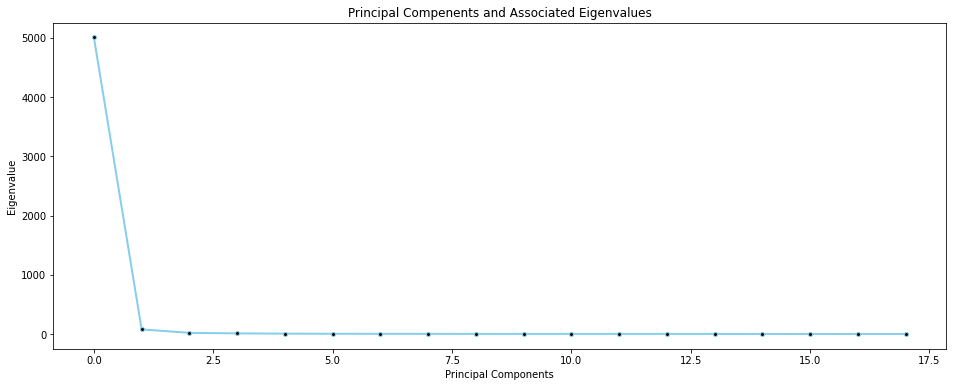

In [0]:
pca=PCA()
pca=pca.fit(X)
eigenvalues = pca.explained_variance_

fig, ax = plt.subplots(figsize = (16,6))
ax.plot(eigenvalues, marker='o', markerfacecolor='k', markersize=4, color='skyblue', linewidth=2)
plt.title("Principal Compenents and Associated Eigenvalues")
ax.set_xlabel('Principal Components')
ax.set_ylabel('Eigenvalue')

[0.97498213 0.99004525 0.99375436 0.99573967 0.99682309 0.99747272
 0.99800541 0.99842566 0.99872465 0.99899528 0.99923138 0.99944112
 0.99962992 0.99978951 0.99992166 1.         1.         1.        ]
dim(K)= 11


Text(0, 0.5, 'Eigenvalue Ratios')

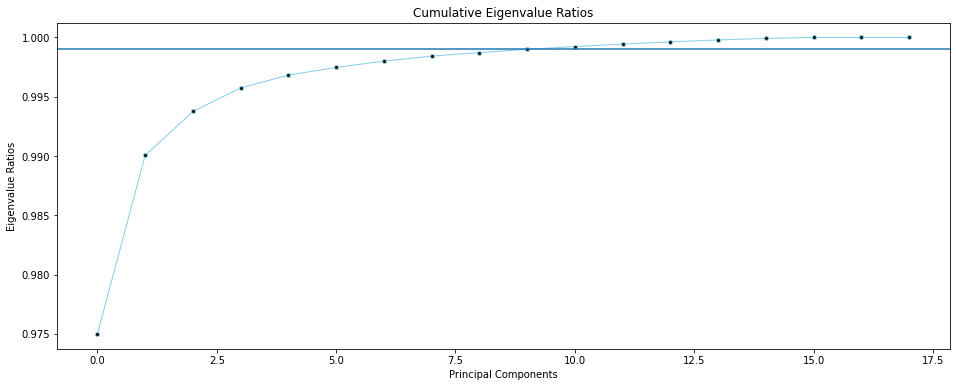

In [0]:
#to compute value of K
cumsum=np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
num_components=np.argmax(cumsum>.999)+1 #account for 0th element
print('dim(K)=', num_components)

fig, ax = plt.subplots(figsize = (16,6))
ax.plot(cumsum, marker='o', markerfacecolor='k', markersize=4, color='skyblue', linewidth=1)
plt.title('Cumulative Eigenvalue Ratios')
plt.axhline(.999)
ax.set_xlabel('Principal Components')
ax.set_ylabel('Eigenvalue Ratios')

### MLP ###

887 cases in NewTrain

input_dim = 18
k hidden layer nodes=1 

numwth = input_dim*k+k+k+1 =< 887

Therefore, 

In [0]:
input=18
k=4

mlp = Sequential()
#mlp.add(Dense(k, activation='relu', input_dim=input, bias_initializer=Constant(value=35)))
#mlp.add(Dense(1, activation='relu', bias_initializer=Constant(value=35)))

mlp.add(Dense(k, activation='relu', input_dim=input, bias_initializer='ones'))
mlp.add(Dense(1, activation='relu', bias_initializer='ones'))

mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 76        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Define root mean squared error as loss function

from keras.losses import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    return tf.keras.backend.sqrt(mean_squared_error(y_true, y_pred))



Using TensorFlow backend.


In [0]:
# configure suitable lr and decay

mlp.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-5, momentum=.9), loss=root_mean_squared_error)
#mlp.compile(optimizer=optimizers.SGD(learning_rate=0.05, decay=1e-7), loss='mean_squared_error')
#mlp.compile(optimizer=optimizers.SGD(learning_rate=0.01, decay=.9), loss='mean_squared_error')

#model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
          #metrics =["accuracy"])

In [0]:
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.mlpRMSEtrain = []
      self.mlpRMSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.mlpRMSEtrain.append(self.model.evaluate(X_train,y_train,verbose = 0))  ##dont change .model bc it is an attribute of the class 
      self.mlpRMSEtest.append(self.model.evaluate(X_test,y_test,verbose = 0))

mlpMyMonitor = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)

In [0]:
begin_time = dt.datetime.now()
mlpMonitor = mlp.fit(X_train, y_train, epochs=100, batch_size=32, callbacks = [mlpMyMonitor, es], validation_data = (X_test, y_test), verbose = 2)
print(dt.datetime.now() - begin_time)

Epoch 1/100
28/28 - 5s - loss: 64.9285 - val_loss: 101.7508
Epoch 2/100
28/28 - 5s - loss: 62.9368 - val_loss: 68.9390
Epoch 3/100
28/28 - 4s - loss: 28.5858 - val_loss: 52.2834
Epoch 4/100
28/28 - 5s - loss: 13.9267 - val_loss: 14.9678
Epoch 5/100
28/28 - 5s - loss: 30.1062 - val_loss: 15.9372
Epoch 6/100
28/28 - 5s - loss: 30.6841 - val_loss: 37.4859
Epoch 7/100
28/28 - 5s - loss: 24.7584 - val_loss: 35.4844
Epoch 8/100
28/28 - 5s - loss: 26.9642 - val_loss: 37.0056
Epoch 9/100
28/28 - 5s - loss: 5.1802 - val_loss: 18.8377
Epoch 10/100
28/28 - 5s - loss: 11.5489 - val_loss: 4.9348
Epoch 11/100
28/28 - 5s - loss: 8.6032 - val_loss: 10.2276
Epoch 12/100
28/28 - 5s - loss: 34.5749 - val_loss: 14.0601
Epoch 13/100
28/28 - 5s - loss: 15.5838 - val_loss: 4.0189
Epoch 14/100
28/28 - 5s - loss: 7.7611 - val_loss: 7.4007
Epoch 15/100
28/28 - 4s - loss: 24.4227 - val_loss: 32.4440
Epoch 16/100
28/28 - 5s - loss: 14.6017 - val_loss: 5.4417
Epoch 17/100
28/28 - 5s - loss: 10.7957 - val_loss: 19.

In [0]:
mlp.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.6667


2.666746139526367

In [0]:
print(min(mlpMyMonitor.mlpRMSEtrain),min(mlpMyMonitor.mlpRMSEtest),len(mlpMyMonitor.mlpRMSEtrain),len(mlpMyMonitor.mlpRMSEtest))

2.0399537086486816 2.5855422019958496 2128 2128


### Plot of Training Set RMSE and Test Set RMSE ###

Text(0, 0.5, 'RMSE')

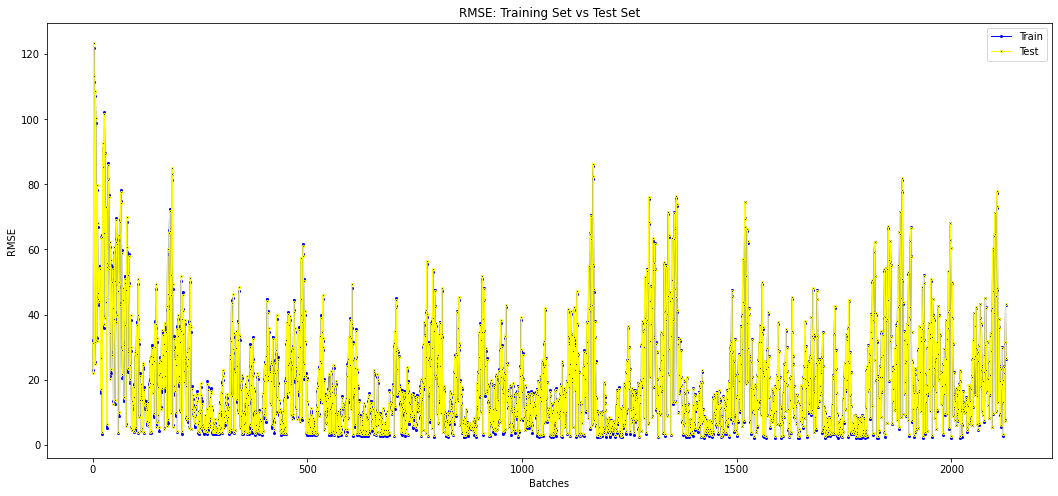

In [0]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(mlpMyMonitor.mlpRMSEtrain, marker='o', markerfacecolor='blue', markersize=2, color='blue', linewidth=1, label = "Train")
ax.plot(mlpMyMonitor.mlpRMSEtest, marker='o', markerfacecolor='k', markersize=2, color='yellow', linewidth=1, label = "Test")
plt.title('RMSE: Training Set vs Test Set')
plt.legend( loc = 'upper right')
ax.set_xlabel('Batches')
ax.set_ylabel('RMSE')

### Plot of True Values vs Predicted Values ###

In [0]:
# reshape y to a two-dimensional numpy array
# shape (901,) is different from shape (901,1)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

y_train = np.reshape(y_train, (887,1))
y_test = np.reshape(y_test,(99,1))

true_values = np.concatenate((y_train, y_test),axis=0)
true_values.shape
#

(986, 1)

In [0]:
Zt_train = mlp.predict(X_train)
Zt_test = mlp.predict(X_test)

pred_values = np.concatenate((Zt_train, Zt_test),axis=0)

Text(0, 0.5, 'Stock Price')

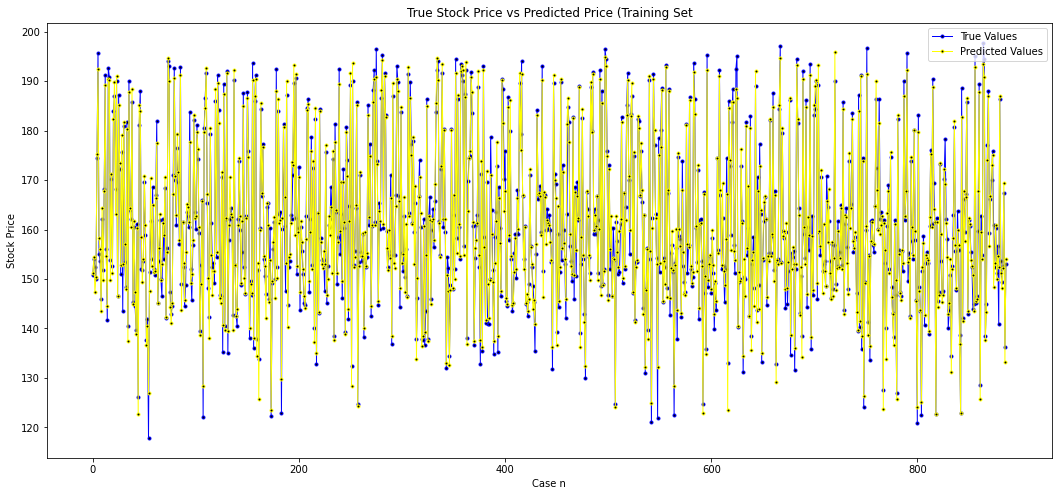

In [0]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(y_train, marker='o', markerfacecolor='k', markersize=3, color='blue', linewidth=1, label = "True Values")
ax.plot(Zt_train, marker='o', markerfacecolor='k', markersize=3, color='yellow', linewidth=1, label = "Predicted Values")
plt.title('True Stock Price vs Predicted Price (Training Set')
plt.legend( loc = 'upper right')
ax.set_xlabel('Case n')
ax.set_ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

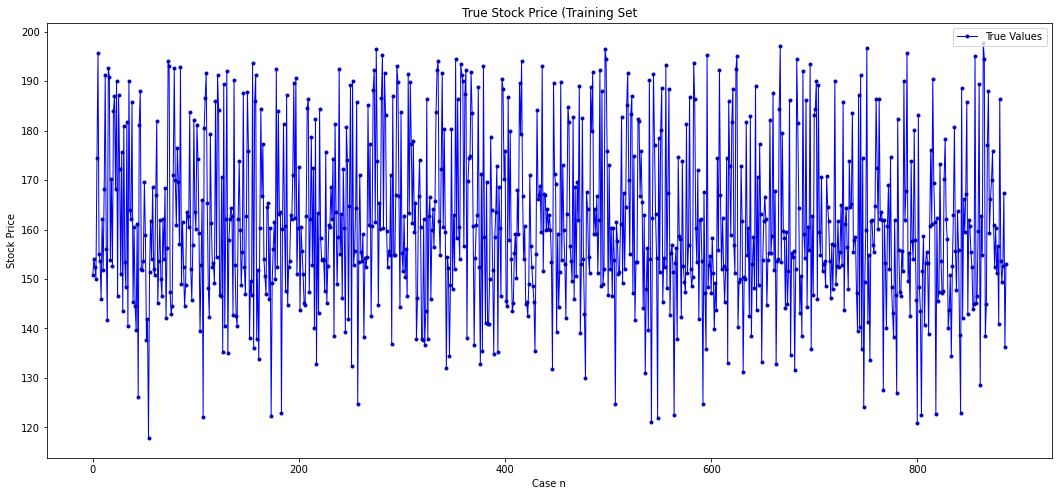

In [0]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(y_train, marker='o', markerfacecolor='k', markersize=3, color='blue', linewidth=1, label = "True Values")
#ax.plot(pred_values, marker='o', markerfacecolor='k', markersize=3, color='yellow', linewidth=1, label = "Predicted Values")
plt.title('True Stock Price (Training Set')
plt.legend( loc = 'upper right')
ax.set_xlabel('Case n')
ax.set_ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

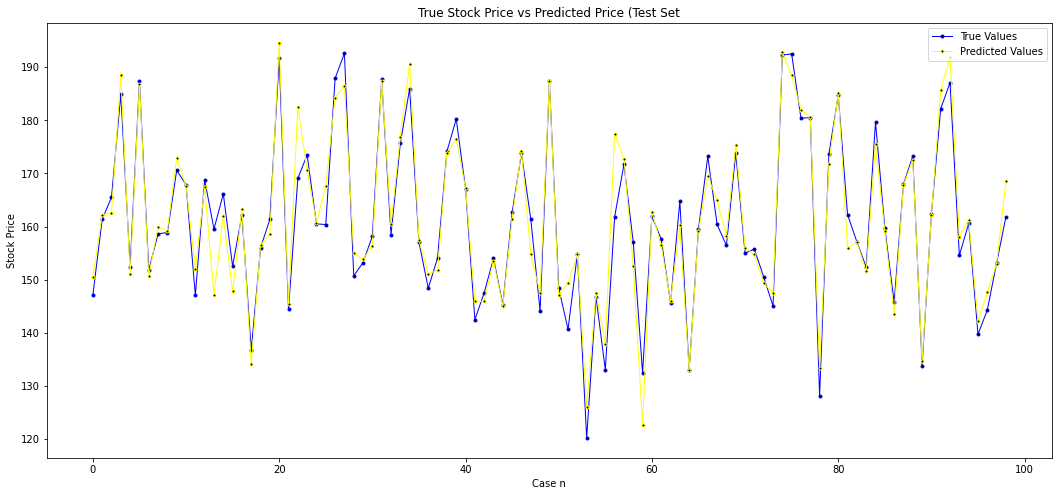

In [0]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(y_test, marker='o', markerfacecolor='k', markersize=3, color='blue', linewidth=1, label = "True Values")
ax.plot(Zt_test, marker='o', markerfacecolor='k', markersize=3, color='yellow', linewidth=1, label = "Predicted Values")
plt.title('True Stock Price vs Predicted Price (Test Set')
plt.legend( loc = 'upper right')
ax.set_xlabel('Case n')
ax.set_ylabel('Stock Price')

Text(0, 0.5, 'Stock Price')

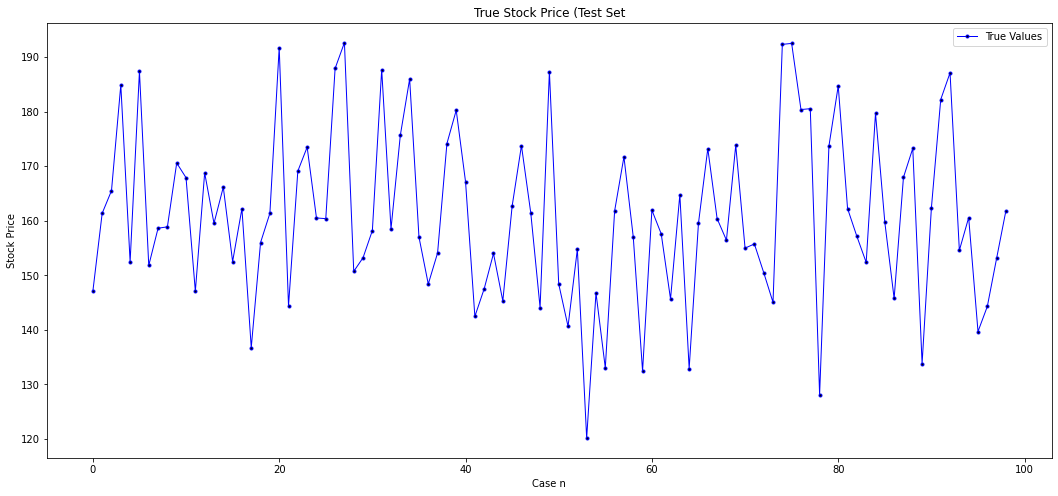

In [0]:
fig, ax = plt.subplots(figsize = (18,8))
ax.plot(y_test, marker='o', markerfacecolor='k', markersize=3, color='blue', linewidth=1, label = "True Values")
#ax.plot(pred_values, marker='o', markerfacecolor='k', markersize=3, color='yellow', linewidth=1, label = "Predicted Values")
plt.title('True Stock Price (Test Set')
plt.legend( loc = 'upper right')
ax.set_xlabel('Case n')
ax.set_ylabel('Stock Price')

### Compute MREP for the Training and Test Set ###

In [0]:
MREP_train = np.mean(abs(Zt_train-y_train)/y_train)
print("The mean relative error of prediction on the training set is :"+" {:.3f}".format(MREP_train))

MREP_test = np.mean(abs(Zt_test-y_test)/y_test)
print("The mean relative error of prediction on the test set is :"+" {:.3f}".format(MREP_test))

The mean relative error of prediction on the training set is : 0.013
The mean relative error of prediction on the test set is : 0.017


### Extract activations from hidden nodes ###

In [0]:
H_train = mlp.layers[0](X_train.values).numpy()
H_train


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[223.4713 , 214.46173,   0.     ,   0.     ],
       [228.10011, 219.23166,   0.     ,   0.     ],
       [218.16615, 208.56186,   0.     ,   0.     ],
       ...,
       [250.13893, 240.80704,   0.     ,   0.     ],
       [197.38486, 187.96939,   0.     ,   0.     ],
       [226.3743 , 219.71112,   0.     ,   0.     ]], dtype=float32)

### Compute mean activity for each node in the hidden layer ###

In [0]:

Yj = []
for i in range(k):  #number of nodes in the hidden layer
  nod = []
  for j in range(887):  #number of cases in training set
    nod.append(H_train[j][i])
  Yj.append(mean(nod))
Yj = np.reshape(np.array(Yj),(k,1))
print(Yj)

[[237.14255]
 [229.15143]
 [  0.     ]
 [  0.     ]]


### Extract weights from hidden layer to the output ###

In [0]:
Wj = mlp.get_weights()[2]
#Wj = np.reshape(Wj,(1,2))
Wj

array([[ 0.3479679 ],
       [ 0.33760256],
       [-1.0827082 ],
       [ 0.09641838]], dtype=float32)

### For each hidden node NODj, compute IMPj; the average impact of NODj prediction Zt ###

In [0]:
IMPj = Yj*Wj
IMPj

array([[82.51799],
       [77.36211],
       [-0.     ],
       [ 0.     ]], dtype=float32)

In [0]:
max(IMPj)

array([82.51799], dtype=float32)

### Compute mean activity of input layer ###

In [0]:
#convert X_train to numpy array
X_train = X_train.to_numpy()
X_train

array([[156.46000671, 157.08000183, 156.88000488, ..., 150.74000244,
        152.57200012, 154.9230011 ],
       [152.1000061 , 154.1000061 , 155.17999268, ..., 154.76199951,
        154.69899902, 153.84549942],
       [146.47000122, 147.28999329, 147.33999634, ..., 147.78999939,
        148.03099976, 147.34950027],
       ...,
       [174.05000305, 173.25999451, 173.05999756, ..., 169.5559967 ,
        170.71799927, 171.62049866],
       [124.06999969, 120.19000244, 117.84999847, ..., 132.94599915,
        132.25299911, 127.96400032],
       [154.22000122, 155.38000488, 154.83999634, ..., 153.91400146,
        154.33800049, 154.3       ]])

In [0]:
Xs = []  ##mean activations for each node in the input layer
for i in range(18):  ##number of nodes in the input layer
  nod = []
  for j in range(887):  ##number of cases in training set
    nod.append(X_train[j][i])
  Xs.append(mean(nod))

Xs = np.reshape(np.array(Xs),(18,1))
Xs

array([[161.28979706],
       [161.22476877],
       [161.17074404],
       [161.14471245],
       [161.11910931],
       [161.10886134],
       [161.08710257],
       [161.08909805],
       [161.11134158],
       [161.05193909],
       [161.05018047],
       [161.06242384],
       [161.04142052],
       [161.0432018 ],
       [161.00126265],
       [161.03969786],
       [161.06468319],
       [161.1779966 ]])

### Extract weights from input to hidden layer ###

In [0]:
Us = mlp.get_weights()[0]
Us

array([[ 0.00375127,  0.19875337,  0.51374763, -0.03674667],
       [-0.54190534,  0.04483635, -0.05613536,  0.28177202],
       [ 0.33031958, -0.0175131 ,  0.41718435,  0.11191574],
       [-0.06049982,  0.0497636 ,  0.5147672 ,  0.18519449],
       [ 0.03124292, -0.22133371,  0.32171154,  0.11328582],
       [ 0.04805286, -0.35023987,  0.48248726, -0.66988343],
       [ 0.3983585 , -0.05613953, -0.3511818 ,  0.23902512],
       [ 0.2815456 ,  0.10321578, -0.4311876 , -0.36769095],
       [-0.42125863, -0.3565577 , -0.36279473, -0.35776716],
       [ 0.09601168,  0.42221904, -0.00220394, -0.53945625],
       [ 0.177303  ,  0.37050813, -0.30491263,  0.24230397],
       [ 0.50400007, -0.0666784 , -0.18685484, -0.11332536],
       [ 0.04800783,  0.1647822 ,  0.33054614, -0.16371644],
       [-0.01075681,  0.54774714, -0.1330162 , -0.09131461],
       [ 0.22015291,  0.04284345, -0.32653305, -0.48712415],
       [-0.18694831,  0.27477795, -0.4081886 ,  0.14659688],
       [ 0.39779133, -0.

In [0]:
c=0
Us2 = []  ## Extract weights linking the input nodes to NOD* on hidden layer
for i in range(18):
  Us2.append(Us[i][c])
Us2 = np.reshape(np.array(Us2),(18,1))
Us2

array([[ 0.00375127],
       [-0.54190534],
       [ 0.33031958],
       [-0.06049982],
       [ 0.03124292],
       [ 0.04805286],
       [ 0.3983585 ],
       [ 0.2815456 ],
       [-0.42125863],
       [ 0.09601168],
       [ 0.177303  ],
       [ 0.50400007],
       [ 0.04800783],
       [-0.01075681],
       [ 0.22015291],
       [-0.18694831],
       [ 0.39779133],
       [ 0.15130186]], dtype=float32)

### Compute Fs average impact of feature s on NOD*

In [0]:
Fs_flat = []
Fs = Xs*Us2
print(Fs)
for i in Fs:
  for j in i:
    Fs_flat.append(j)
Fs_flat = np.sort(np.abs(Fs_flat))
Fs_flat

[[  0.60504128]
 [-87.3685637 ]
 [ 53.23785303]
 [ -9.74922684]
 [  5.03383116]
 [  7.74174193]
 [ 64.17041559]
 [ 45.35392825]
 [-67.86954277]
 [ 15.46286658]
 [ 28.55468036]
 [ 81.17547252]
 [  7.7312487 ]
 [ -1.73231071]
 [ 35.44489721]
 [-30.10610005]
 [ 64.07013391]
 [ 24.38653081]]


array([ 0.60504128,  1.73231071,  5.03383116,  7.7312487 ,  7.74174193,
        9.74922684, 15.46286658, 24.38653081, 28.55468036, 30.10610005,
       35.44489721, 45.35392825, 53.23785303, 64.07013391, 64.17041559,
       67.86954277, 81.17547252, 87.3685637 ])